In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#input data
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

#output data
y = df['Exited']

In [8]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<Axes: xlabel='Exited', ylabel='count'>

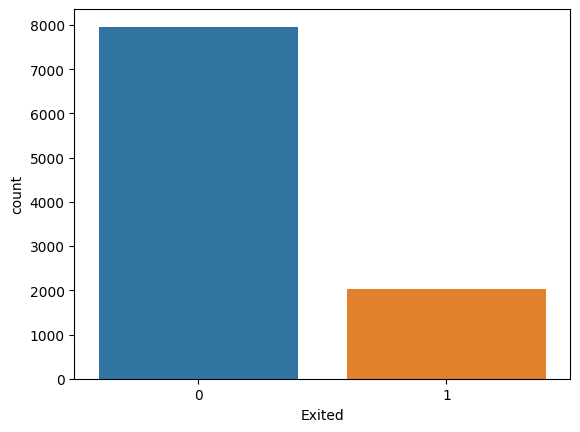

In [10]:
#see who give the company or not
sns.countplot(x=y)

In [13]:
#normalize using standard deviation
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [17]:
#spliting of data for training and testing
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=0, test_size=0.25)

In [29]:
#neural network
from sklearn.neural_network import MLPClassifier

In [30]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0,max_iter=100,activation='relu')

In [31]:
#training the algorithm
ann.fit(x_train,y_train)

C:\Users\Pratik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [32]:
y_pred = ann.predict(x_test)

In [37]:
#import modules
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

#see count of the y test data
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

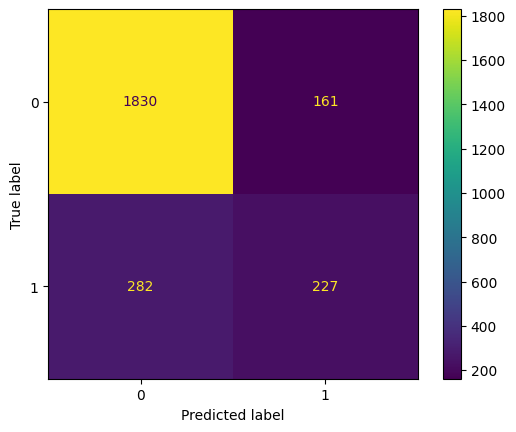

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [36]:
accuracy_score(y_test,y_pred)

0.8228

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [40]:
#we can see from the reort that the accuracy of 1 is less and dataset is imbalance, so we need it to balance

In [44]:
#import package for over sampling
!pip install -U imbalanced-learn


     ------------------------------------ 235.6/235.6 kB 300.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: C:\Users\Pratik\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state=0)

In [47]:
#perform oversampling
x_res, y_res = ros.fit_resample(x,y)

In [50]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [54]:
#scaling of data
x_scaled = scaler.fit_transform(x_res)

In [55]:
#spliting of data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_res,random_state=0, test_size=0.25)

In [63]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0,max_iter=100,activation='relu')

In [59]:
#training the algorithm
ann.fit(x_train,y_train)

C:\Users\Pratik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [60]:
y_pred = ann.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.865143144148669

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

